# Project Report: Pair Trading Strategies for BIST30 Companies

**Prepared by:**

Gamze Gür

Zeynep Sude Karakuş

Ahmet Selim Gül

## Introduction

This project focuses on analyzing hourly stock price data of BIST30 companies to find the highly correlated stocks, develop pair trading strategies and assess their effectiveness.

## Methodology

### Data Collection
Hourly stock price data of BIST30 companies for 2018-2019 was collected and used for analysis.

### Pair Selection
Stocks exhibiting high correlation were identified through statistical analysis and 2 different pairs were selected for the simulation.

### Strategy Development
Two pair trading strategies were developed:
1. **Part 1:** Simple Linear Regression Model:
   - Training data was used to create a simple linear regression model between the selected stock pairs.

2. **Part 2:** Advanced Time Series Model:
   - An advanced time series model was developed to further analyze the chosen stock pairs.

### Simulation
Stock prices in 2020 were used for the simulation. Simulation started with an initial capital of 1 dollar. Buy and sell decisions were given according to the models. At the end of the year, the profit was calculated. 

## Part 1

For Part 1, python was used.

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# 2018-2019 stock price data is read, and the data is merged
df1 = pd.read_csv('Data/20180101_20180401_bist30.csv')
df2 = pd.read_csv('Data/20180402_20180701_bist30.csv')
df3 = pd.read_csv('Data/20180702_20180930_bist30.csv')
df4 = pd.read_csv('Data/20181001_20181230_bist30.csv')
df5 = pd.read_csv('Data/20181231_20190331_bist30.csv')
df6 = pd.read_csv('Data/20190401_20190630_bist30.csv')
df7 = pd.read_csv('Data/20190701_20190929_bist30.csv')
df8 = pd.read_csv('Data/20190930_20191229_bist30.csv')
merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [3]:
# Merged data is converted to wide format and timestamp object is converted to datetime object
merged_df_wide = merged_df.pivot(index='timestamp', columns='short_name', values='price')
merged_df_wide.reset_index(inplace=True)
merged_df_wide["timestamp"] = pd.to_datetime(merged_df_wide["timestamp"], format="%Y-%m-%dT%H:%M:%S%z")

In [4]:
# Number of columns (number of stocks) in the data is assigned to a variable
num_columns = len(merged_df_wide.columns)

### Finding Highly Correlated Stocks

In the cell below, for each pair of stocks, the correlation is found. If correlation is bigger than 0.9, stock names and correlation are printed. The normalized stock prices of the correlated stocks are also plotted.

AKBNK GARAN 0.9671397199754379
AKBNK ISCTR 0.904586555958248
AKBNK SAHOL 0.950155637915807
AKBNK TTKOM 0.8918447144903212
AKBNK VAKBN 0.891915427602005
GARAN ISCTR 0.9018116538029108
GARAN SAHOL 0.899941504845156
ISCTR SAHOL 0.9218135917518007
ISCTR VAKBN 0.8997511129903448
ISCTR YKBNK 0.943875195489932
SAHOL TTKOM 0.8953064396572171
SAHOL VAKBN 0.9133634143462105
SAHOL YKBNK 0.9218910077428522
VAKBN YKBNK 0.8902153092652234


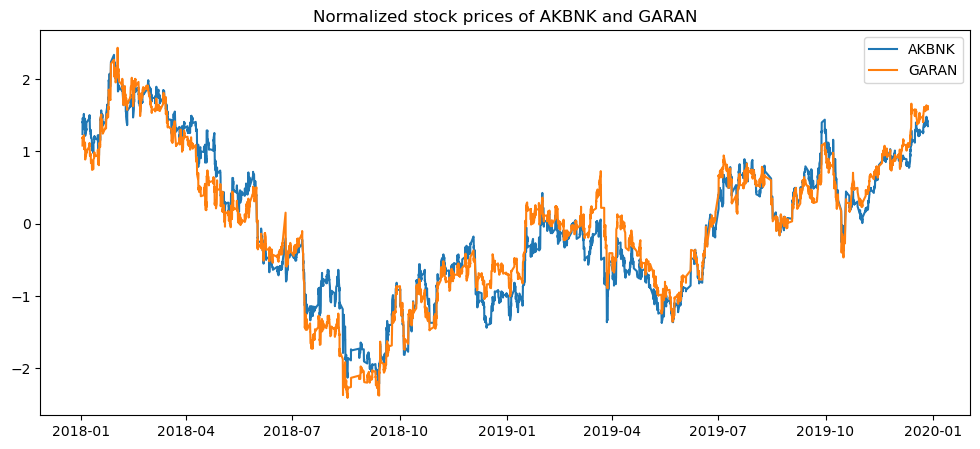

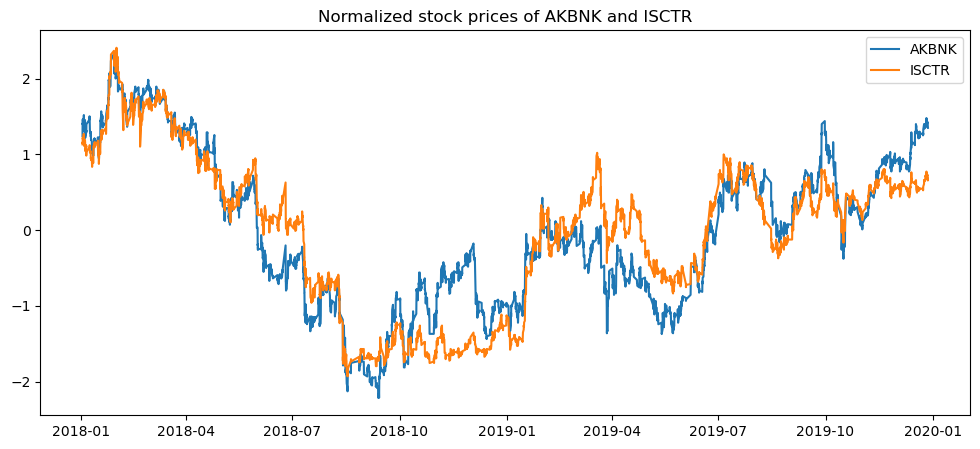

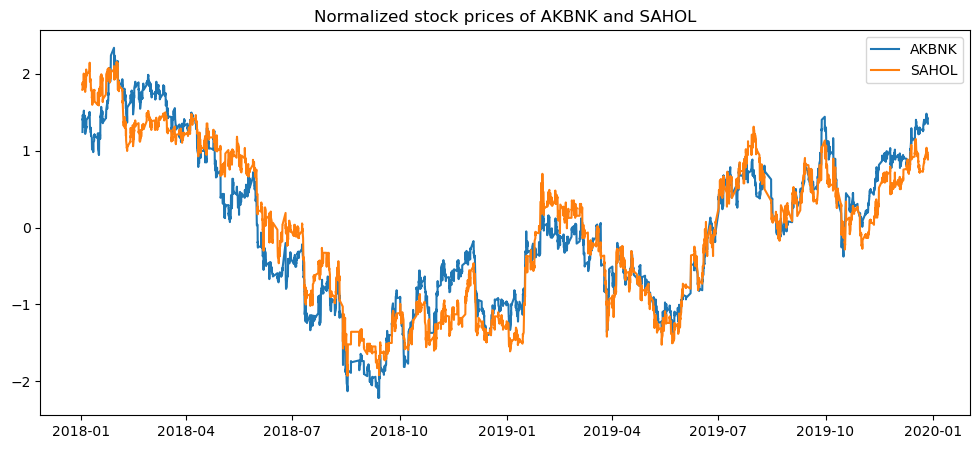

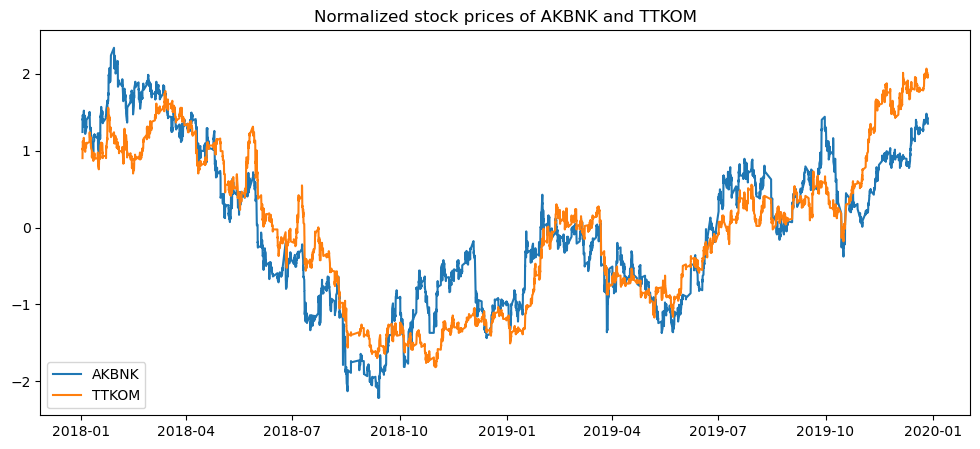

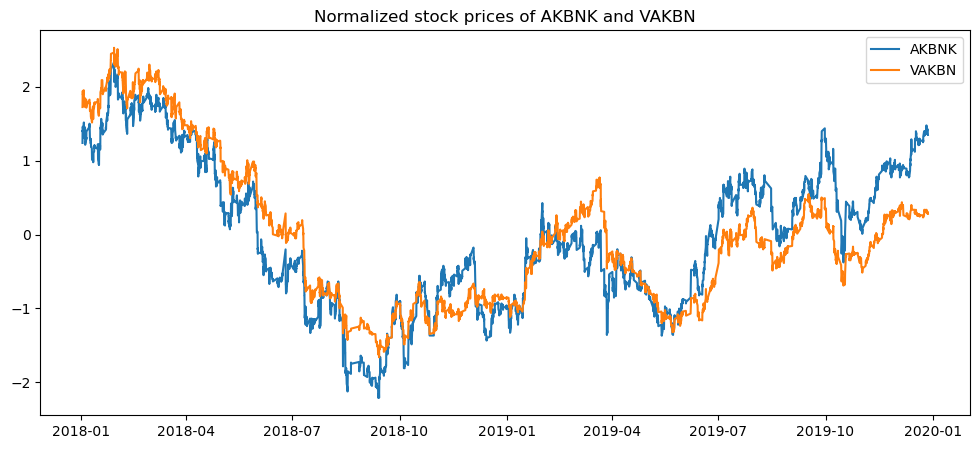

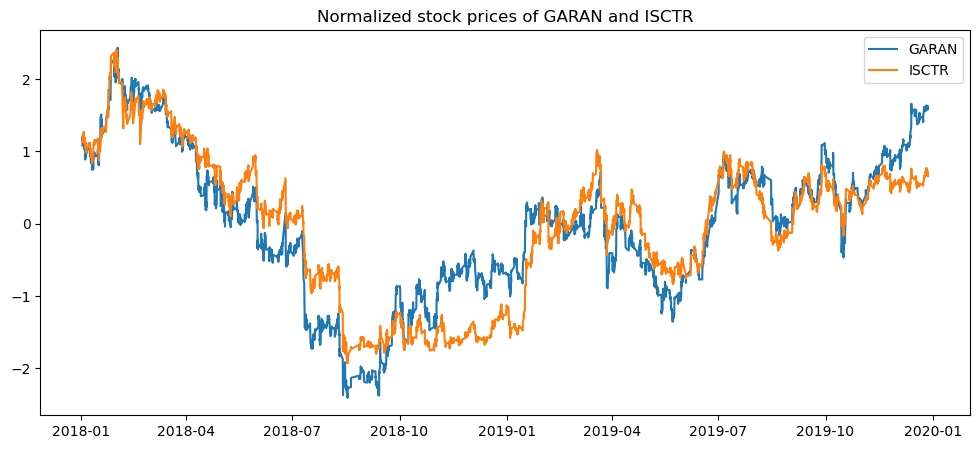

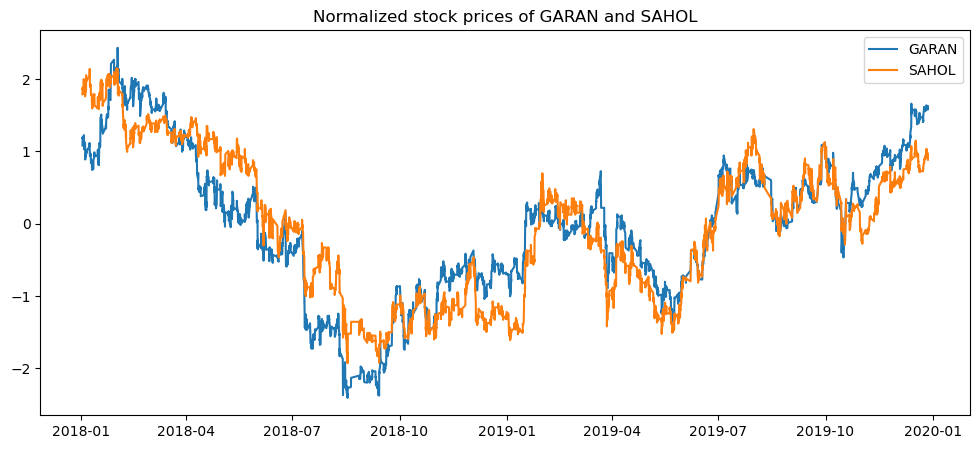

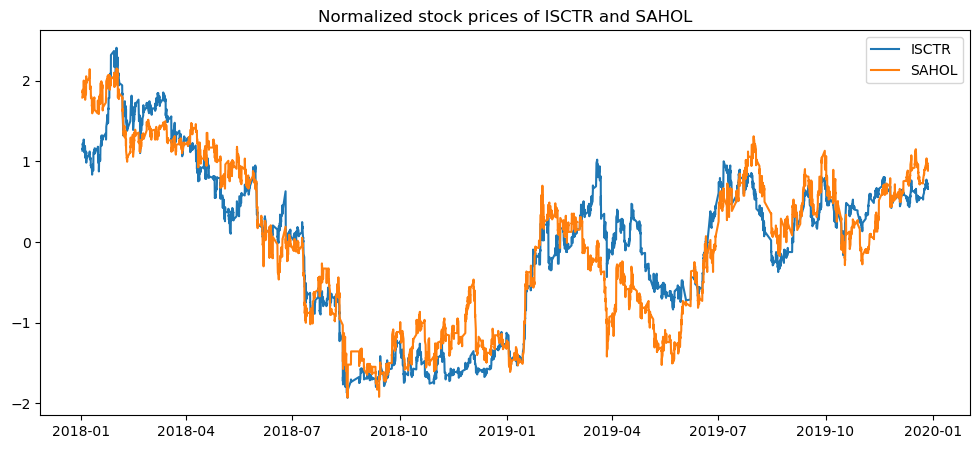

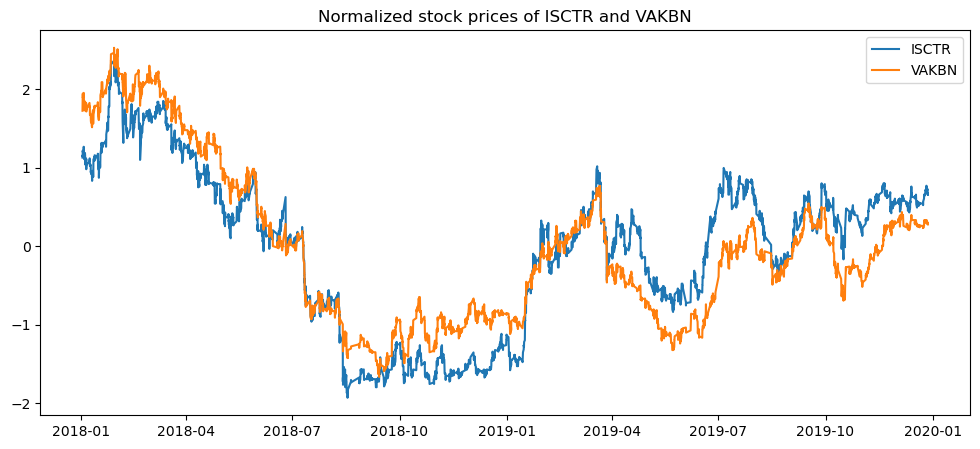

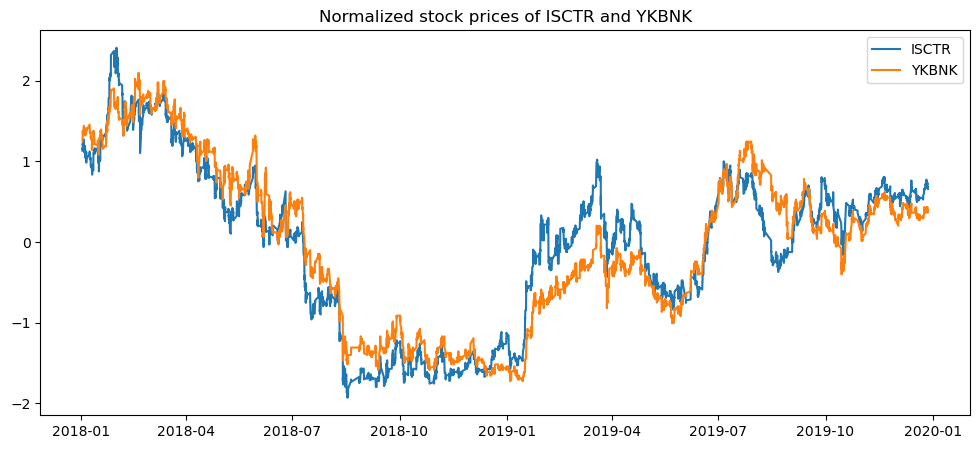

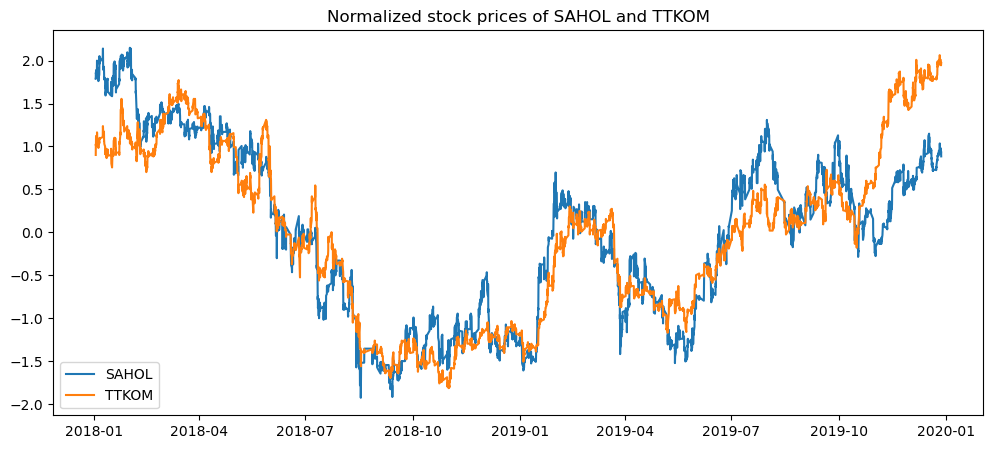

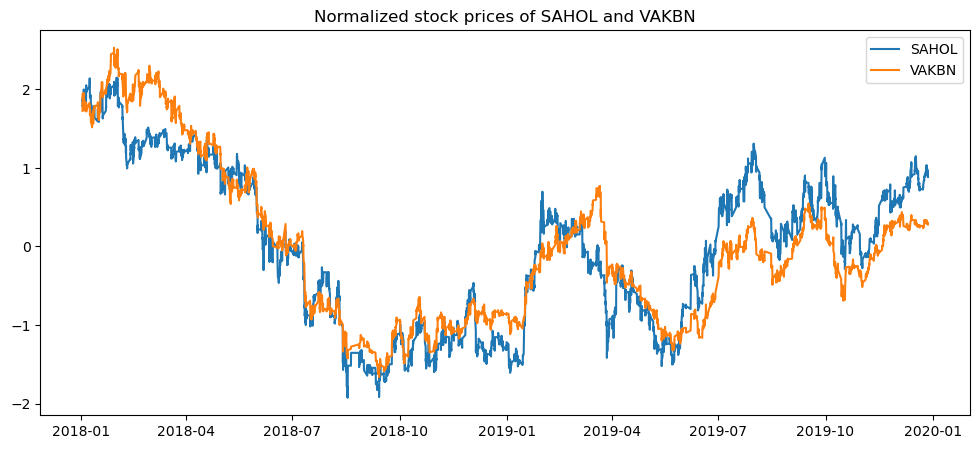

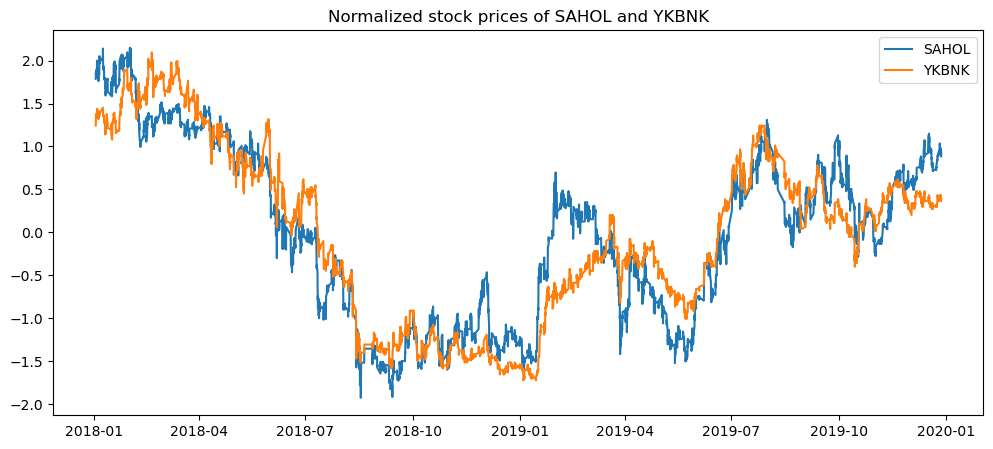

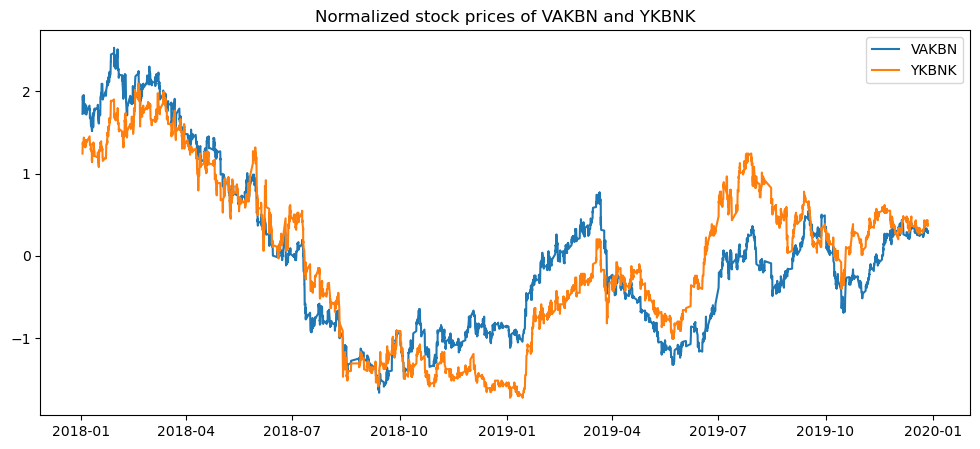

In [5]:
for i in range(1, num_columns):
    for j in range(i+1, num_columns):
        stock1 = merged_df_wide.columns[i]
        stock2 = merged_df_wide.columns[j]
        correlation = merged_df_wide[stock1].corr(merged_df_wide[stock2])
        if correlation > 0.89:
            print(stock1, stock2, correlation)
            fig, ax = plt.subplots(figsize=(12, 5))
            ax.set_title(f"Normalized stock prices of {stock1} and {stock2}")
            stock1_normalized = (merged_df_wide[stock1] - merged_df_wide[stock1].mean()) / merged_df_wide[stock1].std()
            stock2_normalized = (merged_df_wide[stock2] - merged_df_wide[stock2].mean()) / merged_df_wide[stock2].std()
            ax.plot(merged_df_wide["timestamp"], stock1_normalized, label=stock1)
            ax.plot(merged_df_wide["timestamp"], stock2_normalized, label=stock2)
            ax.legend()

To use in simulations, two pairs are selected arbitrarily. AKBNK-ISCTR and AKBNK-VAKBN are selected.

In [6]:
# Selected stocks are assigned to variables.
AKBNK = merged_df_wide["AKBNK"]
ISCTR = merged_df_wide["ISCTR"]
VAKBN = merged_df_wide["VAKBN"]

### Creating Simple Linear Regression Models

Simple linear regression models predicting the price of ISCTR and VAKBN with respect to AKBNK are created. Then, residuals are calculated for both models. The residual standard deviations are calculated. The residuals are later used during the simulation on buy-sell decisions.

                            OLS Regression Results                            
Dep. Variable:                  ISCTR   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:27:58   Log-Likelihood:                 1993.5
No. Observations:                4953   AIC:                            -3983.
Df Residuals:                    4951   BIC:                            -3970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1351      0.016     -8.532      0.0

<Axes: title={'center': 'Residual values'}>

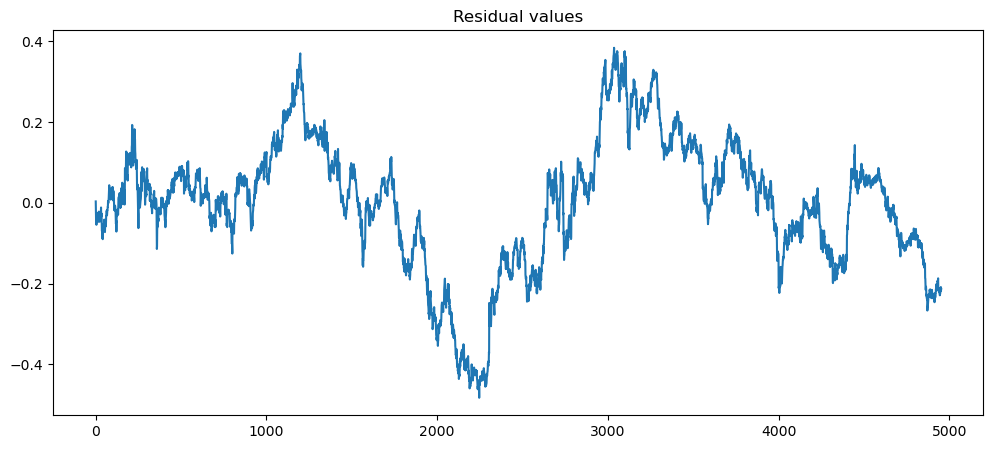

In [7]:
# Simple linear regression model that calculates the expected price of ISCTR with respect to AKBNK.
# The predicted price of ISCTR = alfa1 * AKBNK + beta1
# Residuals are deviations from the predicted value. 

X1 = sm.add_constant(AKBNK)
results1 = sm.OLS(ISCTR, X1).fit()
print(results1.summary())

beta1 = results1.params["AKBNK"]
alfa1 = results1.params["const"]
print(results1.params["const"])
print(results1.params["AKBNK"])

residuals1 = ISCTR - (alfa1 + beta1 * AKBNK)
residual_std1 = np.std(residuals1)
print(residual_std1)

residuals1.plot(figsize=(12, 5), title="Residual values")

                            OLS Regression Results                            
Dep. Variable:                  VAKBN   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.926e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:27:58   Log-Likelihood:                -3480.5
No. Observations:                4953   AIC:                             6965.
Df Residuals:                    4951   BIC:                             6978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7472      0.048    -36.546      0.0

<Axes: title={'center': 'Residual values'}>

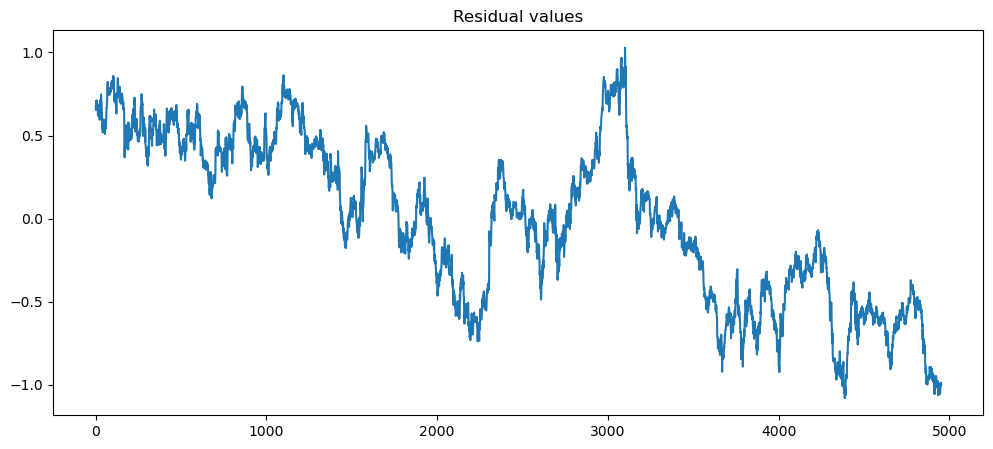

In [8]:
# Simple linear regression model that calculates the expected price of VAKBN with respect to AKBNK.
# The predicted price of VAKBN = alfa3 * AKBNK + beta3
# Residuals are deviations from the predicted value. 

X3 = sm.add_constant(AKBNK)
results3 = sm.OLS(VAKBN, X3).fit()
print(results3.summary())

beta3 = results3.params["AKBNK"]
alfa3 = results3.params["const"]
print(results3.params["const"])
print(results3.params["AKBNK"])

residuals3 = VAKBN - (alfa3 + beta3 * AKBNK)
residual_std3 = np.std(residuals3)
print(residual_std3)

residuals3.plot(figsize=(12, 5), title="Residual values")

In [9]:
# 2020 stock price data is read, and the data is merged
# Merged data is converted to wide format and timestamp object is converted to datetime object
df9 = pd.read_csv('Data/20191230_20200329_bist30.csv')
df10 = pd.read_csv('Data/20200330_20200628_bist30.csv')
df11 = pd.read_csv('Data/20200629_20200927_bist30.csv')
df12 = pd.read_csv('Data/20200928_20201227_bist30.csv')
test_df_merged = pd.concat([df9, df10, df11, df12])
test_df_wide = test_df_merged.pivot(index='timestamp', columns='short_name', values='price')
test_df_wide.reset_index(inplace=True)
test_df_wide["timestamp"] = pd.to_datetime(test_df_wide["timestamp"], format="%Y-%m-%dT%H:%M:%S%z")

In [10]:
# Selected stocks are assigned to variables.
AKBNK_test = test_df_wide["AKBNK"]
ISCTR_test = test_df_wide["ISCTR"]
VAKBN_test = test_df_wide["VAKBN"]

### Simulation

For each pair, a different simulation is run. Simulation logic is as follows:
1. At the start of the simulation, there is 1 unit of money. Number of shares bought from both stocks is 0.
2. At each hour, the stock price of the dependent variable (ISCTR or VAKBN) is predicted with respect to the stock price of independent variable (AKBNK). Then the residual is calculated by subtracting the predicted value from the real value.
3. For determining upper and lower control limits, mean residual at long term is estimated as 0. Then 1-sigma is used for control limits. Upper control limit = residual standard deviation. Lower control limit = -(residual standard deviation)
4. If the residual is higher than 0, which means the price of the dependent variable is higher than expected, there are two checks:
    - if there are dependent variable shares on hand, they are immediately sold.
    - if there is money on hand and the residual value is out of control limits, shares of independent variable are bought.
5. If the residual is lower than 0, which means the price of the dependent variable is lower than expected, there are two checks:
    - if there are independent variable shares on hand, they are immediately sold.
    - if there is money on hand and the residual value is out of control limits, shares of dependent variable are bought.

AKBNK-ISCTR pair trading:
Starting money: 1
Final money: 1.23
Profit: %22.90


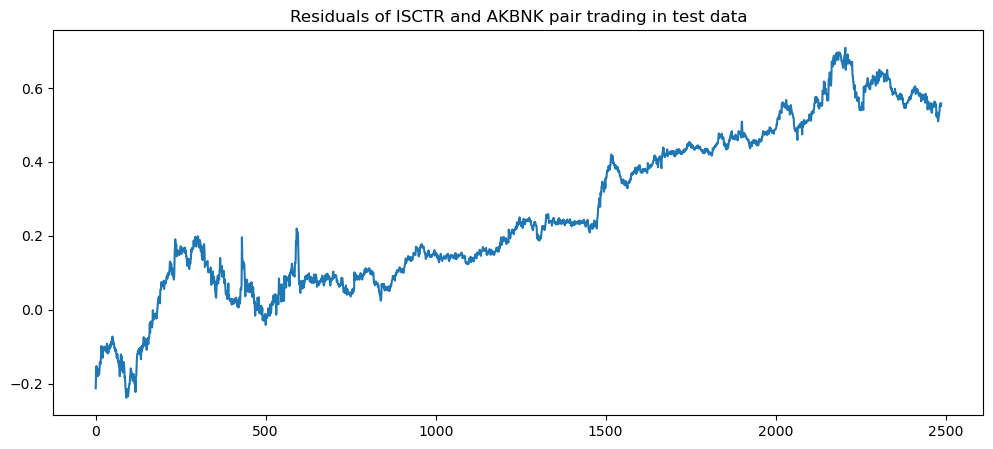

In [11]:
# Simulation for AKBNK-ISCTR pair

test_residuals = ISCTR_test - (alfa1 + beta1 * AKBNK_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title(f"Residuals of ISCTR and AKBNK pair trading in test data")
ax.plot(test_residuals)
money = 1
AKBNK_shares_bought = 0
ISCTR_shares_bought = 0

for i in range(len(test_residuals)):
    if test_residuals[i] > 0:
        if ISCTR_shares_bought > 0:
            money = money + ISCTR_shares_bought * ISCTR_test[i]
            ISCTR_shares_bought = 0
        if money > 0 and  test_residuals[i] > 1 * residual_std1:
            AKBNK_shares_bought = money / AKBNK_test[i]
            money = 0
        
    elif test_residuals[i] < 0:
        if AKBNK_shares_bought > 0:
            money = money + AKBNK_shares_bought * AKBNK_test[i]
            AKBNK_shares_bought = 0
        if money > 0 and test_residuals[i] < -1 * residual_std1:
            ISCTR_shares_bought = money / ISCTR_test[i]
            money = 0
money += AKBNK_shares_bought * AKBNK_test[len(test_residuals)-1] + ISCTR_shares_bought * ISCTR_test[len(test_residuals)-1]
print(f"AKBNK-ISCTR pair trading:\nStarting money: 1\nFinal money: {money:.2f}\nProfit: %{(money-1)*100:.2f}")

AKBNK-VAKBN pair trading:
Starting money: 1
Final money: 1.05
Profit: %5.44


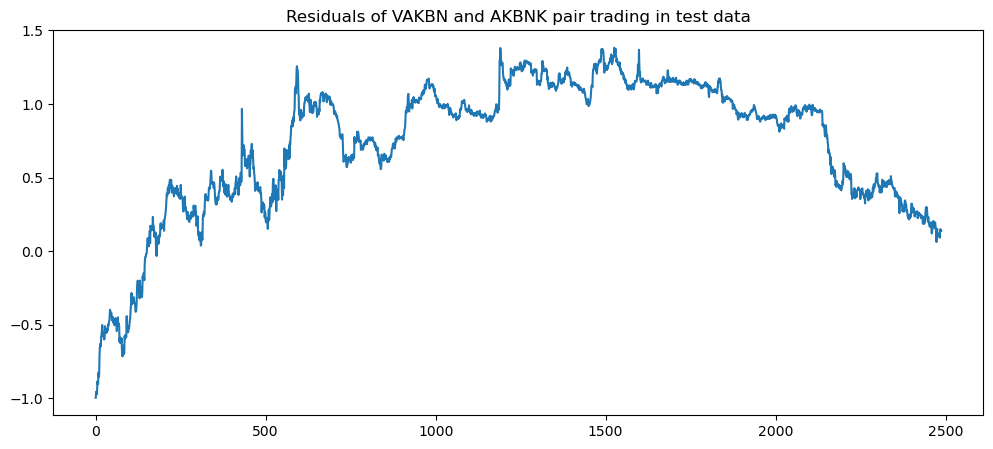

In [12]:
# Simulation for AKBNK-VAKBN pair.

test_residuals = VAKBN_test - (alfa3 + beta3 * AKBNK_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title(f"Residuals of VAKBN and AKBNK pair trading in test data")
ax.plot(test_residuals)
money = 1
AKBNK_shares_bought = 0
VAKBN_shares_bought = 0

for i in range(len(test_residuals)):
    if test_residuals[i] > 0:
        if VAKBN_shares_bought > 0:
            money = money + VAKBN_shares_bought * VAKBN_test[i]
            VAKBN_shares_bought = 0
        if money > 0 and  test_residuals[i] > 1 * residual_std3:
            AKBNK_shares_bought = money / AKBNK_test[i]
            money = 0
        
    elif test_residuals[i] < 0:
        if AKBNK_shares_bought > 0:
            money = money + AKBNK_shares_bought * AKBNK_test[i]
            AKBNK_shares_bought = 0
        if money > 0 and test_residuals[i] < -1 * residual_std3:
            VAKBN_shares_bought = money / VAKBN_test[i]
            money = 0
money += AKBNK_shares_bought * AKBNK_test[len(test_residuals)-1] + VAKBN_shares_bought * VAKBN_test[len(test_residuals)-1]
print(f"AKBNK-VAKBN pair trading:\nStarting money: 1\nFinal money: {money:.2f}\nProfit: %{(money-1)*100:.2f}")

### Analysis of Results
Both simulations returned a net profit nominally. However, in 2020, the yearly inflation was %14.97. The return of investment in AKBNK-ISCTR pair trading was higher than the inflation whereas the return of investment in AKBNK-VAKBN pair trading was lower than the inflation. This means that, although the method is effective in some cases, it should be improved. To improve the efficiency of the method, the stock data used for training should span more years. That way, temporary correlations and long term correlations can be differentiated.